# Project 4, APS1070 Fall 2021
#### **Linear Regression -  13 points**
**Deadline: Nov 26, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Ali Yassine
*   Your **student number**: 1008618113



## Part 1 - Getting Started [1.5 marks]

Ailerons are small hinged sections on the outboard portion of a wing used to control the roll of an airplane. In this project, we are going to design a controller to manage the ailerons of an aircraft based on supervised learning.

![Aileron](https://www.eecg.utoronto.ca/~hadizade/APS1070/p3Ar.jpg)




The following dataset contains 13750 instances, where each instance is a set of 40 features describing the airplane's status. Our goal is to use these features to predict the `Goal` column, which is a command that our controller should issue. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[0.5]**
  *   Using `train_test_split` from Sklearn, split the dataset into training, validation, and test sets ($70\%$ training, $15\%$ validation, and $15\%$ test). When splitting, set `random_state=1`.
  *   Standardize the data using `StandardScaler` from sklearn. 
  *   Insert the first column of all $1$s in the training, validation, and test set.
 
3. Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[1]**

Answer:
The difference between epoch and iteration in SGD is that an iteration is the number of times of weight update (parameter update), and an epoch is when we passed once over all the entire training data to update the parameters of our model. For example if in a data training we have 500 values/points  and we apply minibatch gradient descent with 5 minibatches of size 100 datapoints each so our weights are updated 5 times per epoch (5 weight updates) so we have 5 iterations per epoch.  If we do 2 epochs we will do 10 iterations in total. So the original GD algorithm is just a mini-batch GD but with batch_size=number of samples and the SDG algorithm is just a minibatch GD with batcg_size=1 (each sample is one batch).

In [2]:
#1.
df

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
0,-17,-6,-0.03,0.14,0.59,-0.5,-11,-9,0.015,-0.2,0.019,0.019,0.019,0.020,0.020,0.020,0.020,0.021,0.021,0.021,0.021,0.021,0.021,0.021,0.000,0.0,-0.002,0.0,0.0,0.0,-0.002,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0008
1,-791,15,-0.28,-0.34,1.11,0.9,-10,27,-0.002,4.7,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.013,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.4,0.013,-0.0009
2,-46,48,-0.42,0.07,0.57,0.6,-5,-8,-0.008,0.0,0.018,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,-0.002,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.019,-0.0005
3,496,-5,-0.21,-0.04,0.03,-0.5,-7,6,-0.002,-0.1,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.018,0.018,0.017,-0.001,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.001,0.0,0.001,0.0,0.5,0.017,-0.0005
4,-124,16,-0.02,0.05,0.61,-0.2,-9,-3,0.000,0.0,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.018,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13745,-53,-13,-0.07,0.02,0.58,-2.3,-15,12,0.022,-0.8,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.019,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,-0.001,0.0,0.5,0.019,-0.0007
13746,1,4,-0.11,-0.07,0.47,0.8,-5,8,-0.003,-0.2,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.016,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.5,0.016,-0.0004
13747,425,-14,0.40,0.07,0.41,-2.1,-16,12,0.031,-0.7,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.035,0.034,0.034,0.034,0.034,0.032,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.001,0.0,0.000,0.0,0.001,0.0,0.9,0.032,-0.0015
13748,102,-10,-0.19,0.08,1.30,0.5,-10,-3,-0.003,-0.2,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.051,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.0,1.4,0.051,-0.0015


In [3]:
df.describe()

,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se,Goal
count,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,13750.000000,1.375000e+04,13750.000000,1.375000e+04,13750.000000,13750.000000,13750.000000,1.375000e+04,13750.000000,1.375000e+04,13750.000000,1.375000e+04,13750.000000,13750.000000,13750.000000
mean,-11.102255,-12.599564,0.005937,0.061193,0.629409,0.061825,-11.040218,-0.931273,-0.000953,-0.052305,0.021896,0.021911,0.021911,0.021922,0.021922,0.021936,0.021937,0.021956,0.021956,0.021975,0.021976,0.021992,0.021992,0.022005,-0.000134,0.000000,-0.000057,-1.454545e-07,-0.000072,-6.545455e-07,-0.000089,0.000000,-0.000102,-5.090909e-07,-0.000101,-9.454545e-07,-0.000097,-6.545455e-07,0.623549,0.022005,-0.000872
std,260.214455,25.754565,0.303960,0.118482,0.313693,0.969701,4.146306,10.390653,0.013245,1.121061,0.006872,0.006903,0.006903,0.006909,0.006909,0.006918,0.006918,0.006926,0.006926,0.006938,0.006939,0.006954,0.006955,0.006962,0.000694,0.000012,0.000452,2.696858e-05,0.000479,4.263667e-05,0.000558,0.000012,0.000619,8.312241e-05,0.000642,6.089718e-05,0.000620,4.263667e-05,0.196780,0.006963,0.000408
min,-975.000000,-99.000000,-1.530000,-0.540000,-0.420000,-3.100000,-23.000000,-62.000000,-0.099000,-8.800000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,0.012000,-0.005000,-0.001000,-0.006000,-2.000000e-03,-0.008000,-4.000000e-03,-0.005000,-0.001000,-0.006000,-6.000000e-03,-0.006000,-4.000000e-03,-0.006000,-3.000000e-03,0.400000,0.012000,-0.003600
25%,-178.000000,-29.000000,-0.220000,-0.020000,0.420000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.500000,0.018000,-0.001100
50%,-21.000000,-13.000000,0.020000,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.600000,0.020000,-0.000800
75%,158.000000,3.000000,0.230000,0.130000,0.800000,0.700000,-7.000000,6.000000,0.008000,0.200000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.023000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.700000,0.023000,-0.000600
max,977.000000,94.000000,1.060000,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,15.500000,0.078000,0.078000,0.078000,0.078000,0.078000,0.078000,0.078000,0.076000,0.076000,0.074000,0.074000,0.074000,0.074000,0.073000,0.004000,0.001000,0.004000,2.000000e-03,0.003000,0.000000e+00,0.004000,0.001000,0.003000,6.000000e-03,0.005000,2.000000e-03,0.007000,1.000000e-03,2.000000,0.073000,0.000000


In [4]:
#2.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Goal']), df['Goal'], test_size=0.15, random_state=1)
# 15 % of training is validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.15/0.85), random_state=1)

scaler=StandardScaler()
scaler.fit(X_train)
standardized_training=scaler.fit_transform(X_train)
standardized_val=scaler.fit_transform(X_val)
standardized_test=scaler.fit_transform(X_test)
standardized_training=pd.DataFrame(standardized_training, index=X_train.index, columns=X_train.columns)
standardized_val=pd.DataFrame(standardized_val,index=X_val.index, columns=X_val.columns)
standardized_test=pd.DataFrame(standardized_test,index=X_test.index, columns=X_test.columns)

standardized_training.insert(0, "Bias", [1] * int(standardized_training.shape[0]))
standardized_val.insert(0, "Bias", [1] *int(standardized_val.shape[0]))
standardized_test.insert(0, "Bias", [1] *int(standardized_test.shape[0]))

In [5]:
standardized_training

,Bias,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
8086,1,0.300454,-0.585755,1.129531,0.917832,0.600308,0.449172,-0.945470,-0.392270,0.223766,-0.137873,1.456885,1.448916,1.448982,1.447081,1.447307,1.443495,1.443308,1.438802,1.438864,1.434003,1.434071,1.430323,1.430131,1.427962,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,1.398352,1.427740
9723,1,-1.025053,0.758921,0.244951,1.339421,1.456453,-0.892745,-0.705563,-1.255174,-0.227281,-0.048042,1.023838,1.017629,1.017680,1.015949,1.016117,1.012854,1.012705,1.008747,1.008796,1.004605,1.004658,1.001489,1.001341,0.999404,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,0.892517,0.999244
2609,1,0.626084,-0.777851,0.277713,-1.105794,-0.985146,1.274966,1.213696,0.950026,-0.753503,-0.227703,-0.564002,-0.563756,-0.563761,-0.708578,-0.708644,-0.853258,-0.853242,-0.854820,-0.854834,-0.856119,-0.856136,-0.856792,-0.856748,-0.857680,-1.251431,-0.010194,2.376153,0.003398,2.189260,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.624988,-0.857570
8125,1,0.020795,-0.047884,0.638098,1.508056,0.410053,1.171742,0.014159,-2.213957,-1.881121,0.221449,0.590790,0.730104,0.730145,0.728528,0.728656,0.725760,0.725636,0.722045,0.722084,0.718340,0.718382,0.715600,0.715481,0.713699,-2.693109,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,0.892517,0.713581
10773,1,-0.258864,-0.163142,0.638098,-0.852841,0.219799,-0.892745,0.254066,1.141782,-0.527979,-0.856517,0.013394,0.011293,0.011308,0.009975,0.010006,0.008025,0.007964,0.005288,0.005303,0.002677,0.002692,0.000876,0.000832,-0.000564,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.000579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,1,0.143385,-0.047884,-0.770679,0.243290,1.488162,0.242723,-1.185377,0.278878,1.652082,0.401110,2.611678,2.599014,2.599121,2.596765,2.597147,2.591872,2.591583,2.585613,2.585713,2.579064,2.579175,2.573880,2.573571,2.570783,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,2.410022,2.570395
11442,1,-0.684099,0.297889,-0.344770,0.074654,1.044235,0.449172,-0.705563,-1.063418,-1.054201,0.490941,0.590790,0.586342,0.586378,0.584817,0.584926,0.582213,0.582102,0.722045,0.722084,0.718340,0.718382,0.572655,0.572551,0.570846,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,-1.639085,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,0.892517,0.570749
7049,1,1.430583,-0.777851,1.457154,1.086467,-1.207110,0.139499,0.014159,-1.446931,-0.828677,-1.036178,-0.275304,-0.276231,-0.276226,-0.277446,-0.277454,-0.279070,-0.279105,-0.281415,-0.281409,-0.283588,-0.283584,-0.285013,-0.285028,-0.286269,0.190246,-0.010194,0.126021,0.003398,0.149229,0.015573,0.156948,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,-0.119153,-0.286243
4556,1,0.580113,-0.701012,1.555441,-0.346935,0.314926,0.345947,-0.705563,0.758269,0.825162,-0.137873,1.745583,1.736440,1.736517,1.734502,1.734767,1.587042,1.586842,1.295450,1.295508,1.290870,1.290933,1.287378,1.287201,1.285110,0.190246,-0.010194,0.126021,0.003398,4.229291,0.015573,1.952980,0.0,0.162483,0.003441,0.154774,0.012817,0.152677,0.011771,1.398352,1.284908


In [6]:
standardized_val

,Bias,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
7510,1,0.833583,-0.239760,-0.700826,-0.950721,-0.252648,-0.573071,1.241077,0.565646,-0.071162,-0.096494,0.905520,0.897798,0.897798,0.895133,0.895133,0.892214,0.892214,0.887858,0.887858,0.880384,0.880384,0.874954,0.874954,0.724736,0.196179,0.0,0.105216,0.0,0.140286,0.0,0.167376,0.0,0.179461,0.0,0.161977,0.0,1.750071,0.0,0.904257,0.724736
12561,1,1.207940,-0.279694,-0.135591,0.312756,-1.047618,2.503025,1.969551,-1.267174,-0.377171,0.261541,0.010556,0.007908,0.007908,0.006747,0.006747,0.004803,0.004803,0.000645,0.000645,-0.002997,-0.002997,-0.006337,-0.006337,-0.303552,0.196179,0.0,0.105216,0.0,0.140286,0.0,0.167376,0.0,0.179461,0.0,0.161977,0.0,1.750071,0.0,-0.130972,-0.303552
849,1,-0.839560,-1.637456,0.961630,-0.361099,2.800034,-1.393364,-0.458695,0.372717,0.999868,-0.096494,2.098806,2.084317,2.084317,2.079649,2.079649,2.075429,2.075429,2.070808,2.070808,2.058226,2.058226,2.490654,2.490654,2.928208,0.196179,0.0,0.105216,0.0,0.140286,0.0,0.167376,0.0,0.179461,0.0,-5.726271,0.0,-6.136333,0.0,2.974716,2.928208
9191,1,-0.174887,-0.359562,-1.299311,-0.024171,-0.125453,0.657367,0.269779,-0.206068,0.005340,-0.096494,-0.586086,-0.437037,-0.437037,-0.437447,-0.437447,-0.438902,-0.438902,-0.442961,-0.442961,-0.444688,-0.444688,-0.446982,-0.446982,-0.450450,-2.594974,0.0,0.105216,0.0,0.140286,0.0,0.167376,0.0,0.179461,0.0,0.161977,0.0,0.172790,0.0,-0.648586,-0.450450
8351,1,-0.946519,-1.278048,-0.833823,-1.119185,0.224333,-0.573071,1.241077,0.662110,0.617357,0.530067,-0.884408,-0.881981,-0.881981,-1.029705,-1.029705,-1.030509,-1.030509,-1.034436,-1.034436,-1.033609,-1.033609,-1.034509,-1.034509,-0.891144,-1.199398,0.0,2.366266,0.0,0.140286,0.0,0.167376,0.0,0.179461,0.0,0.161977,0.0,-2.981772,0.0,-0.648586,-0.891144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11358,1,0.883243,-2.316336,1.028128,-0.276867,-0.825026,0.349757,0.755428,0.372717,-0.606677,-1.260108,-0.287765,-0.288722,-0.288722,-0.289382,-0.289382,-0.291000,-0.291000,-0.295092,-0.295092,-0.297458,-0.297458,-0.300100,-0.300100,-0.303552,0.196179,0.0,0.105216,0.0,0.140286,0.0,0.167376,0.0,0.179461,0.0,0.161977,0.0,0.172790,0.0,-0.130972,-0.303552
1760,1,-0.415545,-0.279694,-1.565304,-0.613794,0.001742,-0.470535,0.269779,0.565646,-0.147664,0.082523,-0.586086,-0.585352,-0.585352,-0.585511,-0.585511,-0.586804,-0.586804,-0.590830,-0.590830,-0.591918,-0.591918,-0.593864,-0.593864,-0.597348,0.196179,0.0,0.105216,0.0,0.140286,0.0,0.167376,0.0,0.179461,0.0,0.161977,0.0,-1.404491,0.0,-0.648586,-0.597348
5426,1,-2.023749,-0.559233,-1.665051,0.312756,1.305492,0.657367,-0.944344,-0.302532,0.311349,0.798594,-0.735247,-0.733667,-0.733667,-0.733576,-0.733576,-0.586804,-0.586804,-0.590830,-0.590830,-0.297458,-0.297458,-0.300100,-0.300100,-0.303552,0.196179,0.0,0.105216,0.0,-4.278195,0.0,0.167376,0.0,-2.931693,0.0,0.161977,0.0,0.172790,0.0,-0.130972,-0.303552
612,1,-1.190997,0.479055,-1.631802,-0.108403,0.605918,-0.367998,-0.215870,-0.206068,-0.224167,0.261541,-0.586086,-0.585352,-0.585352,-0.585511,-0.585511,-0.586804,-0.586804,-0.590830,-0.590830,-0.591918,-0.591918,-0.593864,-0.593864,-0.597348,0.196179,0.0,0.105216,0.0,0.140286,0.0,0.167376,0.0,0.179461,0.0,0.161977,0.0,-1.404491,0.0,-0.648586,-0.597348


In [7]:
standardized_test

,Bias,inputs ClimbRate,Sgz,P,Q,CurPitch,CurRoll,AbsRoll,DiffClb,DiffRollRate,DiffDiffClb,SeTime1,SeTime2,SeTime3,SeTime4,SeTime5,SeTime6,SeTime7,SeTime8,SeTime9,SeTime10,SeTime11,SeTime12,SeTime13,SeTime14,DiffSeTime1,DiffSeTime2,DiffSeTime3,DiffSeTime4,DiffSeTime5,DiffSeTime6,DiffSeTime7,DiffSeTime8,DiffSeTime9,DiffSeTime10,DiffSeTime11,DiffSeTime12,DiffSeTime13,DiffSeTime14,Alpha,Se
12870,1,0.678611,1.092809,0.550121,0.937267,-0.634568,0.257593,0.216857,-0.967734,0.512005,-1.518240,-0.119528,-0.121081,-0.121081,-0.124334,-0.124334,-0.126884,-0.126924,-0.128846,-0.128846,-0.131819,-0.131947,-0.134739,-0.134916,-0.136694,0.201714,0.022022,0.151804,0.022022,0.169357,0.022022,0.158074,0.0,0.161595,0.022022,0.168594,0.029551,0.158857,0.030546,-0.111043,-0.136824
11578,1,0.038491,-0.656688,0.317621,-0.847735,-0.404916,0.154306,0.708749,0.596947,0.131560,-0.052251,-0.562233,-0.561371,-0.561371,-0.563546,-0.563546,-0.565345,-0.565278,-0.566751,-0.566751,-0.569493,-0.569342,-0.569514,-0.569359,-0.569431,0.201714,0.022022,0.151804,0.022022,0.169357,0.022022,0.158074,0.0,0.161595,0.022022,0.168594,0.029551,0.158857,0.030546,-0.621245,-0.569310
2255,1,0.085616,-0.020507,-1.110595,-0.422734,0.808958,-1.498298,0.954695,0.499154,0.055471,-0.742128,1.356155,1.346550,1.346550,1.339708,1.339708,1.334654,1.334257,1.330839,1.330839,1.327096,1.326039,1.314512,1.313225,1.305762,0.201714,0.022022,0.151804,0.022022,0.169357,0.022022,0.158074,0.0,0.161595,0.022022,0.168594,0.029551,0.158857,0.030546,1.419564,1.304793
12386,1,0.242701,0.059016,-0.712023,1.872269,0.907380,-0.568708,-0.766927,-1.945660,0.359827,0.378923,1.651292,1.640077,1.640077,1.632517,1.632517,1.919270,1.918729,1.914713,1.914713,1.910662,1.909233,1.894212,1.892481,1.882744,0.201714,0.022022,0.151804,0.022022,-4.253219,0.022022,0.158074,0.0,0.161595,0.022022,0.168594,0.029551,0.158857,0.030546,1.929766,1.881440
7083,1,-0.389565,0.297583,0.284407,-1.187736,-0.044035,0.877320,0.216857,0.694740,-0.629329,0.465157,-0.709802,-0.708134,-0.708134,-0.709950,-0.709950,-0.711499,-0.711396,-0.712719,-0.712719,-0.715384,-0.715141,-0.714439,-0.714173,-0.713676,0.201714,0.022022,0.151804,0.022022,0.169357,0.022022,0.158074,0.0,0.161595,0.022022,0.168594,0.029551,0.158857,0.030546,-0.621245,-0.713471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13086,1,-0.417055,-0.139791,1.413694,0.512267,0.021580,0.257593,0.954695,-0.967734,-0.629329,-0.483424,-0.414665,-0.414608,-0.414608,-0.417142,-0.417142,-0.419192,-0.419160,-0.420783,-0.420783,-0.423602,-0.423544,-0.424589,-0.424545,-0.425185,0.201714,0.022022,0.151804,0.022022,0.169357,0.022022,0.158074,0.0,0.161595,0.022022,0.168594,0.029551,0.158857,0.030546,-0.621245,-0.425148
9217,1,2.166988,0.297583,-0.678809,-0.677735,-1.881250,1.600334,1.692533,-0.576564,-0.705417,0.896330,-0.267097,-0.267845,-0.267845,-0.270738,-0.270738,-0.273038,-0.273042,-0.274814,-0.274814,-0.277710,-0.277745,-0.279664,-0.279731,-0.425185,0.201714,0.022022,0.151804,0.022022,0.169357,0.022022,0.158074,0.0,0.161595,0.022022,0.168594,0.029551,1.734441,0.030546,-0.621245,-0.425148
1465,1,-1.324219,0.695196,-1.077380,-0.167734,0.710536,-0.465421,-0.275035,0.010192,-0.096706,1.758677,-0.562233,-0.561371,-0.561371,-0.563546,-0.563546,-0.565345,-0.565278,-0.566751,-0.566751,-0.569493,-0.569342,-0.569514,-0.569359,-0.425185,0.201714,0.022022,0.151804,0.022022,0.169357,0.022022,0.158074,0.0,0.161595,0.022022,0.168594,0.029551,-2.992312,0.030546,-0.621245,-0.425148
8664,1,0.007074,-0.736210,0.749407,-0.167734,-0.208072,-2.014736,-1.258819,0.694740,1.729427,0.292688,-0.267097,-0.267845,-0.267845,-0.270738,-0.270738,-0.273038,-0.273042,-0.274814,-0.274814,-0.277710,-0.277745,-0.279664,-0.279731,-0.280940,0.201714,0.022022,0.151804,0.022022,0.169357,0.022022,0.158074,0.0,0.161595,0.022022,0.168594,0.029551,0.158857,0.030546,-0.111043,-0.280986


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the matrix inversion, as numpy.linalg.inv may cause numerical issues.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy import linalg

def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

def Direct_sol (X_train,y_train , X_valid, y_valid):
  W = np.dot(linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train)) # Train the model using training set: finding weights
  y_pred_train = np.dot(X_train, W) # prediction on the training set
  y_pred_valid = np.dot(X_valid, W) # prediction on the validation set
  RMSE_train = rmse(y_pred_train, y_train)
  RMSE_valid = rmse(y_pred_valid, y_valid)  
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)

  return W , y_pred_train , y_pred_valid , RMSE_train , RMSE_valid

In [11]:
W_DS , y_pred_train_DS, y_pred_valid_DS , RMSE_train_DS , RMSE_valid_DS=Direct_sol (standardized_training,y_train,standardized_val, y_val)

RMSE on training set:  0.0001816700330032822
RMSE on validation set:  0.00017491610911001267


## Part 3 - Full Batch Gradient Descent [2 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you have calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[0.5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

Answer :
The curve for both training and validation RSME are exactly the same from the graph that it is hard to differeciate between them. This means that the Full batch gradient descent is very good at predicting new points as there were points from the training data. The model is behaving the same on both validation and training and is not  uderfitting. The RSME values after  convergence are also approx. identical for training and validatio meaning that our model is doing good on training set and validatio set.

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [12]:
import time
start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##
# initializing the weights to a small number

w=np.random.uniform(low=0.0000001, high=0.00019, size=standardized_training.shape[1])
lr = .01  ### Learning rate

rmse_array_train=[]
rsme_array_val=[]

for epoch in range (0, 5000): 
  y_pred_t= np.dot(standardized_training,w.T).reshape (-1,1)
  y_pred_val=np.dot(standardized_val,w.T).reshape (-1,1)

  rsme_train=rmse(y_pred_t,y_train.to_numpy().reshape(-1,1))
  rsme_val=rmse(y_pred_val,y_val.to_numpy().reshape(-1,1))

  rmse_array_train.append(rsme_train)
  rsme_array_val.append(rsme_val)

  if(rsme_val<=1.001*RMSE_valid_DS):
    break
  else:
    gradient = (1/len(y_train) * np.dot(standardized_training.T, y_pred_t-y_train.to_numpy().reshape(-1,1))).reshape(1,-1)
    w = w - lr * gradient ### weight update

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 3.1207821369171143 (s) ---


Text(0.5, 1.0, 'Epochs vs. RSME')

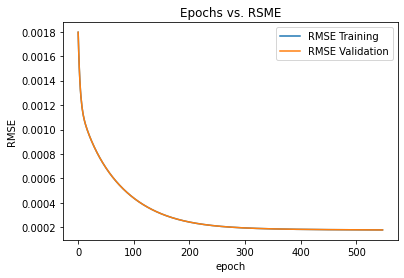

In [14]:
plt.plot(rmse_array_train, label='RMSE Training')
plt.plot(rmse_array_train, label='RMSE Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.title('Epochs vs. RSME')

In [43]:
def fullbgd (standardized_training,y_train,standardized_val,y_val,lr,ct):

  w=np.random.uniform(low=0.0000001, high=0.00019, size=standardized_training.shape[1])

  rmse_array_train=[]
  rsme_array_val=[]
  time_array=[]
  bestw=0
  start_time = time.time() ## Records current time
  for epoch in range (0, 5000): 
    y_pred_t= np.dot(standardized_training,w.T).reshape (-1,1)
    y_pred_val=np.dot(standardized_val,w.T).reshape (-1,1)

    rsme_train=rmse(y_pred_t,y_train.reshape(-1,1))
    rsme_val=rmse(y_pred_val,y_val.reshape(-1,1))

    rmse_array_train.append(rsme_train)
    rsme_array_val.append(rsme_val)
    time_array.append(time.time() - start_time)

    if(rsme_val<=ct):
      bestw=w
      break
      
    else:
      gradient = (1/len(y_train) * np.dot(standardized_training.T, y_pred_t-y_train.reshape(-1,1))).reshape(1,-1)
      w = w - lr * gradient ### weight update
  return bestw,rmse_array_train,rsme_array_val,time_array


In [30]:
bestw,rmse_array_train,rsme_array_val,time_array=fullbgd(standardized_training,y_train,standardized_val,y_val,0.01,1.001*RMSE_valid_DS)

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]** 

RSme values are not so different so our model is not underfitting overftting.

**From plot 1**
When batch is small  our model converges with less epochs  and when our batch is relatively big  we take more epoch to achieve convergence. If we take a look close we notice that for small batches the Batch GD training RSME is more noisy (look at fluctuations in training with small batches) and for big ones it is smooth (look at bacth=8192). This is the tradeoff existing everywhere, the smaller the batch the faster covergence but that comes with a cost that our GD will be noisier and convergence is harder to achieve and it also might diverge. For batch_size=2,4,16 for example our model diverged due to the fluctuation caused by noise while computing gradient and updating the weights. The divergence condition is set in the function. Notice that our model is performing badly on training and not even reachin <= ct condition but it is reaching it on Validation with OK fluctuations.

**From plot 2**
Same as plot 1 explanation. But we add that here we see the blue graph representing a small batch size on training being noisy and not achieving good performance as good as the others bigger batches_size (look at training RSME valeus), Training on small batches causes noise indeed but faster convergence time is achieved with less epoch needed!

**From plot 3** when batch size increase the elaped time decreases as expected.

After a meeting with in the Q and A session on Thursday, the TA told me that I  can ignore the extra data. For example our training data has 9624 samples dividing it by 5 gives a modulo of 4. The extra is the 4 samples. We can get rid of this data while computing the Gradient  because it will create a bias and everytime we are shuffling the data so it is better to ignore it. But I will do 2 functions just to get  a better picture with numbers
1) without taking the extra data into consideration in the iterations
2) with taking them into consideration
My inspiration to write the code https://github.com/akkinasrikar/Machine-learning-bootcamp/blob/master/Mini%20batch%20gradient%20descent/mini%20batch.ipynb other than course material 

In [ ]:
bestw,rmse_array_train,rsme_array_val,time_array=fullbgd(standardized_training,y_train,standardized_val,y_val,0.01,1.001*RMSE_valid_DS)

In [48]:
def get_batches2(x,y,batch_size):
  
  #take the ceiling of the division if 5 batches for ex. 
  #we need 6 since an extra one is required 
  

  batch_nb=int(np.ceil(x.shape[0]/batch_size))
  batches_array_X=[]
  batches_array_y=[]
  temp=0
  for i in range(batch_nb):
    xb=x[temp:temp+batch_size,:]
    yb=y[temp:temp+batch_size]
    batches_array_X.append(xb)
    batches_array_y.append(yb)
    temp=temp+batch_size

  return batches_array_X,batches_array_y


# we use the function above to create minibatches and loop in iterations from 0 to batch_nb-1 where batch_nb is the ceiling
#of the division
def minibatchGD3(X_train,X_val,y_train,y_val,batch_size,lr,ct):


  #initialize weights to random numbers less than  0.01 
  w=np.random.uniform(low=0.0000001, high=0.00019, size=X_train.shape[1])

  #take the ceiling always 
  batch_nb=int(np.ceil(X_train.shape[0]/batch_size))

  #get indexes to permute them after each epoch from 0 to size-1
  #we will shuffle them at the beginning of each epoch 
  indexes=np.arange(X_train.shape[0])
  X_trainc=np.array(X_train.copy())
  y_trainc=np.array(y_train.copy())

  #initialize the arrays that we will fill
  rmse_array_train=[]
  rsme_array_val=[]
  best_weightsofar=0
  time_array=[]

  # initialize the start time to 0 seconds
  start_time = time.time()

  for epoch in range (0, 5000):
    # at the beigining of each epoch   
    indexes=np.random.permutation(indexes)
    
    X_train_shuffle=X_trainc[indexes]
    y_train_shuffle=y_trainc[indexes]
    Xb,yb=get_batches2(X_train_shuffle,y_train_shuffle,batch_size)
  
    for iteration in (0,batch_nb-1):
        y_pred_train= np.dot(Xb[iteration],w.T).reshape(-1,1)
        gradient = (1/len(Xb[iteration]) * np.dot(Xb[iteration].T, y_pred_train - yb[iteration].reshape(-1,1))).reshape(1,-1)
        w = w - lr * gradient
        
  

    y_pred_t= np.dot(X_train,w.T).reshape(-1,1)
    y_pred_val=np.dot(X_val,w.T).reshape (-1,1)
    rsme_train=rmse(y_pred_t.reshape(-1,1),y_train.reshape(-1,1))
    rsme_val=rmse(y_pred_val.reshape(-1,1),y_val.reshape(-1,1))
    rmse_array_train.append(rsme_train)
    rsme_array_val.append(rsme_val)
    total_epoch_time= (time.time() - start_time)
    time_array.append(total_epoch_time)
    sorted_val=sorted(rsme_array_val)

    #change them to numpy array
    sorted_val=np.array(sorted_val)
    
    
    # Check if we need more updates using the ct value input threshold
    if(rsme_array_val[-1] <= ct):
       best_weightsofar=w
       converged=True
       print("The model converged! ")
       break

    # add a condition for divergence check if a subarray is increasing from 10:700 range or any other big range

    elif  len(rsme_array_val) >=700:
      v=rmse_array_train[10:700]
      count=0
      for c in range(len(rmse_array_train)):
        statement=all(i < j for i, j in zip(v, v[c:]))
        if(statement==True):
          count=count+1
      if(count>5):
        best_weightsofar=w
        converged=False
        print("The model diverged! Please change the ct value,batch_size or the learning rate ")
        break
        

  return best_weightsofar,rmse_array_train,rsme_array_val,time_array,converged

# In this function I took the extra data into consideration 

def minibatchGD4(X_train,X_val,y_train,y_val,batch_size,lr,ct):


  #initialize weights to random numbers less than  0.01 
  w=np.random.uniform(low=0.0000001, high=0.00019, size=X_train.shape[1])

  #take the ceiling always 
  batch_nb=int(np.ceil(X_train.shape[0]/batch_size))

  #get indexes to permute them after each epoch from 0 to size-1
  #we will shuffle them at the beginning of each epoch 
  indexes=np.arange(X_train.shape[0])
  X_trainc=np.array(X_train.copy())
  y_trainc=np.array(y_train.copy())

  #initialize the arrays that we will fill
  rmse_array_train=[]
  rsme_array_val=[]
  best_weightsofar=0
  time_array=[]

  # initialize the start time to 0 seconds
  start_time = time.time()

  for epoch in range (0, 5000):
    # at the beigining of each epoch   
    indexes=np.random.permutation(indexes)
    temp=0
    X_train_shuffle=X_trainc[indexes]
    y_train_shuffle=y_trainc[indexes]
    
  
    for iteration in (0,batch_nb-1):
        Xb=X_train_shuffle[temp:temp+batch_size,:]
        yb=y_train_shuffle[temp:temp+batch_size]
        y_pred_train= np.dot(Xb,w.T).reshape(-1,1)
        gradient = (1/len(Xb) * np.dot(Xb.T, y_pred_train - yb.reshape(-1,1))).reshape(1,-1)
        w = w - lr * gradient
        temp=temp+batch_size 
  

    y_pred_t= np.dot(X_train,w.T).reshape(-1,1)
    y_pred_val=np.dot(X_val,w.T).reshape (-1,1)
    rsme_train=rmse(y_pred_t.reshape(-1,1),y_train.reshape(-1,1))
    rsme_val=rmse(y_pred_val.reshape(-1,1),y_val.reshape(-1,1))
    rmse_array_train.append(rsme_train)
    rsme_array_val.append(rsme_val)
    total_epoch_time= (time.time() - start_time)
    time_array.append(total_epoch_time)
    sorted_val=sorted(rsme_array_val)

    #change them to numpy array
    sorted_val=np.array(sorted_val)
    
    
    # Check if we need more updates using the ct value input threshold
    if(rsme_array_val[-1] <= ct):
       best_weightsofar=w
       converged=True
       print("The model converged! ")
       break

    # add a condition for divergence check if a subarray is increasing from 10:700 range or any other big range

    elif  len(rsme_array_val) >=700:
      v=rmse_array_train[10:700]
      count=0
      for c in range(len(rmse_array_train)):
        statement=all(i < j for i, j in zip(v, v[c:]))
        if(statement==True):
          count=count+1
      if(count>5):
        best_weightsofar=w
        converged=False
        print("The model diverged! Please change the ct value,batch_size or the learning rate ")
        break
        

  return best_weightsofar,rmse_array_train,rsme_array_val,time_array,converged


In [49]:
best_weightsofar,rmse_array_train,rsme_array_val,time_array,converged=minibatchGD3(standardized_training.values,standardized_val,y_train.values,y_val.values,9624,0.01,1.001*RMSE_valid_DS)

The model converged! 


For batch size 2
The model diverged! Please change the ct value,batch_size or the learning rate 
For batch size 4
The model diverged! Please change the ct value,batch_size or the learning rate 
For batch size 16
The model diverged! Please change the ct value,batch_size or the learning rate 
For batch size 32
The model converged! 
For batch size 64
The model converged! 
For batch size 128


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 256


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 512


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 1024


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 2048


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 4096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 8192


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Training time vs. Batch size')

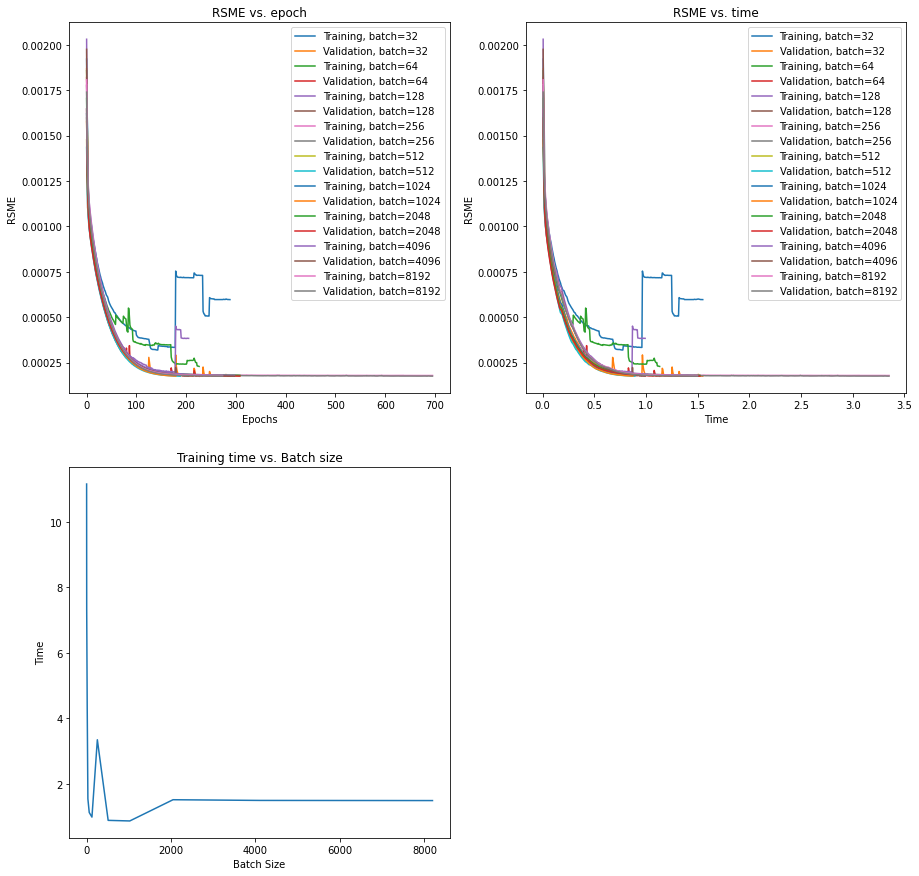

In [60]:
batch_try=[2,4,16,32,64,128,256,512,1024,2048,4096,8192]
total_time=[]
plt.figure(figsize=(15,15))

for elem in batch_try:
  print("For batch size",elem)
  bw,rsmet,rsmev,timee,converged = minibatchGD3(standardized_training.values,standardized_val,y_train.values,y_val.values,elem,0.01,1.001*RMSE_valid_DS)

  if(converged==True):
  
    # For Sine Function
    ax1 = plt.subplot(221) 
    ax1.plot(rsmet,label='Training, batch='+str(elem))
    ax1.plot(rsmev,label='Validation, batch='+str(elem))
    ax1.legend()
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('RSME')
    ax1.set_title("RSME vs. epoch")
    
      
    # For Cosine Function
    ax2 = plt.subplot(222)
    ax2.plot(timee,rsmet,label='Training, batch='+str(elem))
    ax2.plot(timee,rsmev,label='Validation, batch='+str(elem))
    ax2.legend()
    ax2.set_xlabel('Time')
    ax2.set_ylabel('RSME')
    ax2.set_title("RSME vs. time")


  total_time.append(timee[-1])

ax3=plt.subplot(223)
ax3.plot(batch_try, total_time)
ax3.set_xlabel('Batch Size')
ax3.set_ylabel('Time')
ax3.set_title("Training time vs. Batch size")


Here I proved that ignoring the "extra samples" wot affect our result. In fact it reduces our computation time by doing less one iteration when total_train_samples % batch_nb (ceiling of div by batch size) is not =0. In this case 64 highlights it. We can see that in the graph before using minibatchGD3 it was smoother. So this data is just adding noise as the TA exlplained me.

For batch size 2
The model converged! 
For batch size 4
The model diverged! Please change the ct value,batch_size or the learning rate 
For batch size 16
The model diverged! Please change the ct value,batch_size or the learning rate 
For batch size 32
The model converged! 
For batch size 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 128


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 256


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 512


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 1024


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 2048


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 4096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 
For batch size 8192


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


The model converged! 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Training time vs. Batch size')

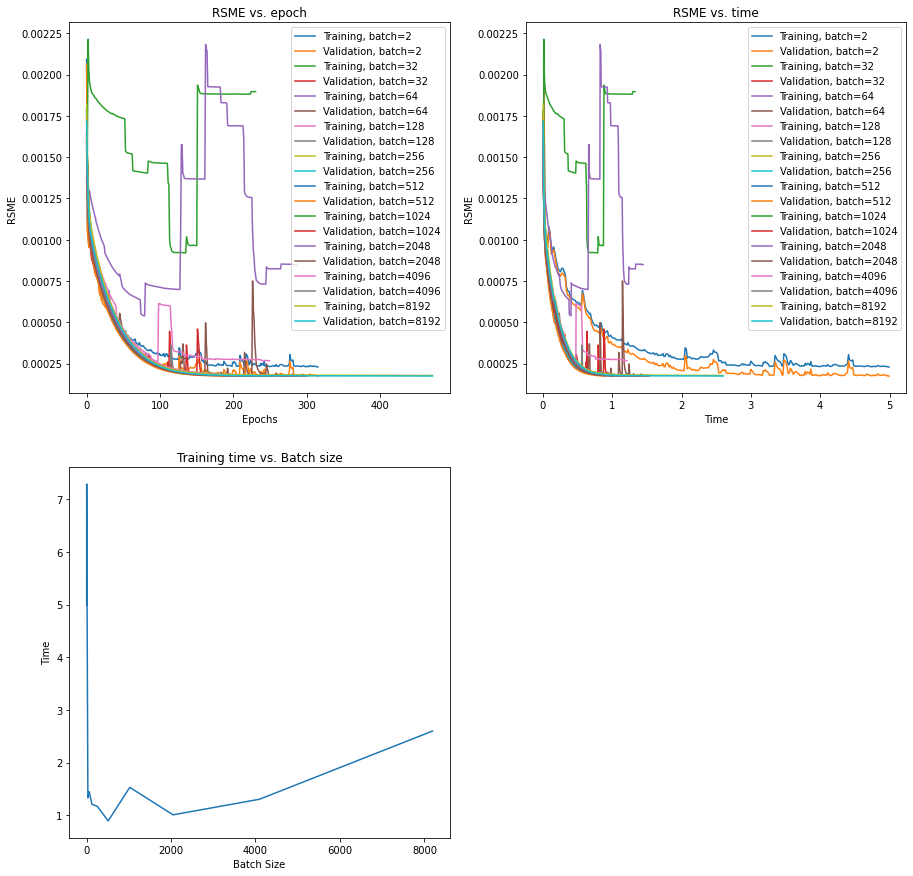

In [61]:
batch_try=[2,4,16,32,64,128,256,512,1024,2048,4096,8192]
total_time=[]
plt.figure(figsize=(15,15))

for elem in batch_try:
  print("For batch size",elem)
  bw,rsmet,rsmev,timee,converged = minibatchGD4(standardized_training.values,standardized_val,y_train.values,y_val.values,elem,0.01,1.001*RMSE_valid_DS)

  if(converged==True):
  
    # For Sine Function
    ax1 = plt.subplot(221) 
    ax1.plot(rsmet,label='Training, batch='+str(elem))
    ax1.plot(rsmev,label='Validation, batch='+str(elem))
    ax1.legend()
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('RSME')
    ax1.set_title("RSME vs. epoch")
    
      
    # For Cosine Function
    ax2 = plt.subplot(222)
    ax2.plot(timee,rsmet,label='Training, batch='+str(elem))
    ax2.plot(timee,rsmev,label='Validation, batch='+str(elem))
    ax2.legend()
    ax2.set_xlabel('Time')
    ax2.set_ylabel('RSME')
    ax2.set_title("RSME vs. time")


  total_time.append(timee[-1])

ax3=plt.subplot(223)
ax3.plot(batch_try, total_time)
ax3.set_xlabel('Batch Size')
ax3.set_ylabel('Time')
ax3.set_title("Training time vs. Batch size")

## Part 5 - Introducing Momentum [3.5 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. Where $\beta$ is the momentum coefficient, between [0, 1]. 

Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

* Add momentum to your training function. **[1]**
* Train a linear model with a specific batch size and various values of momentums. 
  *  Plot your training and validation RMSE for each epoch. **[1]**
  *  With some plots (or tables) show how momentum affects the training time.  **[1]**
  * Summarize your experiments and comment on the effect of momentum. **[0.5]**
  Based on plot same as part 4 explanation. RSME val and train are similar which is good so we do not have to worry over-underfitting. The beta value also affects the convergence time indeed. For small values of beta the more time it took for our model to converge and vice-versa (bigger beta=0.8 is smaller time).  We achieved better time in term of convergence (faster1) than part 4 indeed.

In [62]:
def minibatchGD_momentum(X_train,X_val,y_train,y_val,batch_size,lr,ct,beta):
  #initialize weights to random numbers less than  0.01 
  w=np.random.uniform(low=0.0000001, high=0.00019, size=X_train.shape[1])

  #take the ceiling always 
  batch_nb=int(np.ceil(X_train.shape[0]/batch_size))

  #get indexes to permute them after each epoch from 0 to size-1
  #we will shuffle them at the beginning of each epoch 
  indexes=np.arange(X_train.shape[0])
  X_trainc=np.array(X_train.copy())
  y_trainc=np.array(y_train.copy())

  #initialize the arrays that we will fill
  rmse_array_train=[]
  rsme_array_val=[]
  best_weightsofar=0
  time_array=[]

  # initialize the start time to 0 seconds
  start_time = time.time()

  for epoch in range (0, 5000):
    # at the beigining of each epoch   
    indexes=np.random.permutation(indexes)
    temp=0
    g_array=[]
    X_train_shuffle=X_trainc[indexes]
    y_train_shuffle=y_trainc[indexes]
    Xb,yb=get_batches2(X_train_shuffle,y_train_shuffle,batch_size)
    #base case
    y_pred_train0= np.dot(Xb[0],w.T).reshape(-1,1)
    g0= (1/len(Xb[0]) * np.dot(Xb[0].T, y_pred_train0 - yb[0].reshape(-1,1))).reshape(1,-1)
    g_array.append(g0)
  
    for iteration in (1,batch_nb-1):
        y_pred_train= np.dot(Xb[iteration],w.T).reshape(-1,1)
        g1 = (1/len(Xb[iteration]) * np.dot(Xb[iteration].T, y_pred_train - yb[iteration].reshape(-1,1))).reshape(1,-1)
        w = w - lr * (beta*g_array[-1] + (1-beta)*g1)
        g_array.append(g1)
        

    y_pred_t= np.dot(X_train,w.T).reshape(-1,1)
    y_pred_val=np.dot(X_val,w.T).reshape (-1,1)
    rsme_train=rmse(y_pred_t.reshape(-1,1),y_train.reshape(-1,1))
    rsme_val=rmse(y_pred_val.reshape(-1,1),y_val.reshape(-1,1))
    rmse_array_train.append(rsme_train)
    rsme_array_val.append(rsme_val)
    total_epoch_time= (time.time() - start_time)
    time_array.append(total_epoch_time)
    sorted_val=sorted(rsme_array_val)

    #change them to numpy array
    sorted_val=np.array(sorted_val)
    
    
    # Check if we need more updates using the ct value input threshold
    if(rsme_array_val[-1] <= ct):
       best_weightsofar=w
       converged=True
       print("The model converged! ")
       break

    # add a condition for divergence check if a subarray is increasing from 10:700 range or any other big range

    elif  len(rsme_array_val) >=700:
      v=rmse_array_train[10:700]
      count=0
      for c in range(len(rmse_array_train)):
        statement=all(i < j for i, j in zip(v, v[c:]))
        if(statement==True):
          count=count+1
      if(count>5):
        best_weightsofar=w
        converged=False
        print("The model diverged! Please change the ct value,batch_size or the learning rate ")
        break
        

  return best_weightsofar,rmse_array_train,rsme_array_val,time_array,converged

The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 
The model converged! 


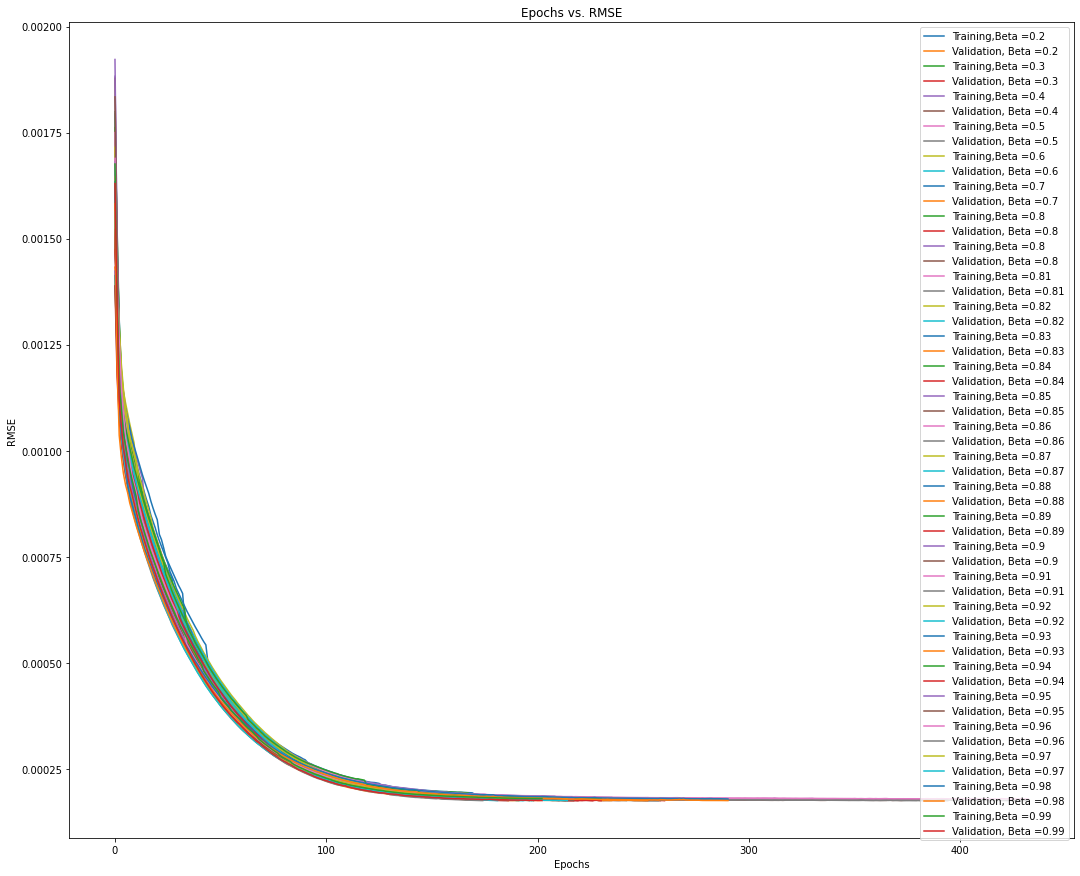

In [63]:
beta_array=np.arange(0.2,0.8,0.1)
beta_array=np.append(beta_array,np.arange(0.8,1.00,0.01))
time_taken=[]
plt.figure(figsize=(18,15))

for elem in beta_array:
  #take a batch_size of 128
  bw,rsmet,rsmev,timee,converged = minibatchGD_momentum(standardized_training.values,standardized_val,y_train.values,y_val.values,256,0.01,1.001*RMSE_valid_DS,elem)
  time_taken.append(timee[-1])
  plt.plot(rsmet, label='Training,Beta =' + str(np.round(elem,3)))
  plt.plot(rsmev, label='Validation, Beta =' + str(np.round(elem,3)))
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('RMSE')
  plt.title('Epochs vs. RMSE')
  

Text(0.5, 1.0, 'Beta Coefficient vs Training Time')

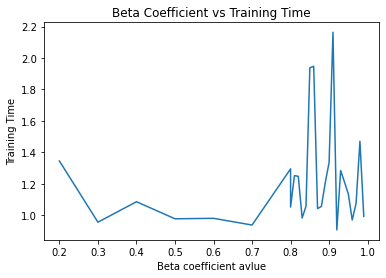

In [64]:
plt.plot(beta_array,time_taken)
plt.xlabel('Beta coefficient avlue')
plt.ylabel('Training Time')
plt.title('Beta Coefficient vs Training Time')

## Part 6 - Finalizing a model [1 marks]
Based on your findings from the previous parts, pick a model (or combination of model settings) that you think would work best for our dataset and evaluate it on the test set. 

Briefly describe your model selections/settings. **[0.5]** 

Answer:".. but it’s a little bit shifted to the right, because we average over larger number of example(around 50 for beta=0.98). Beta = 0.9 provides a good balance between these two extremes." 

**Quoting the link from Part 5:** https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d 

- Based on this article I will choose **beta=0.9** as momentum coefficient.
- As we have seen big batch size makes less noise in the data and small ones increase the noise a bit but at the cost of a very fast convergence time. So we need to take a comprise between the two. As I used **batch_size=256** in part 5 and had a great performance I will choose it here. 256/size(data) = 2.7 % of our data so that's a good compromise between the two values. Also from part 4 it is indicated that for better performance it is better to use batch sizes with power of 2. 
- as we did not change and see how lr affects the model I will keep **lr=0.01** since in the project we did not focus on it and tuned the model based on variable lr values. As well making it bigger might cause divergence, so it is better to keep it small.

Summarize the performance of your model for the task of managing ailerons of an aircraft. **[0.5]** 
- RSME train and val are nearly the same so we are not over/underfitting
- We have a rsme testing acuracy of about 0.00017 so there is 0.17 % chance of failure which coul be improved since it is for the aircraft's ailerons control operation. We can further tune our learning rate to achieve better results or use more versions of SDG algorithms. But our results are ok and the model can be used as long the airplanes are remote and have no people in them that might get injured.

In [65]:
bw_final,rsmet_final,rsmev_final,time_final,converged_final = minibatchGD_momentum(standardized_training.values,standardized_val,y_train.values,y_val.values,256,0.01,1.001*RMSE_valid_DS,0.9)
y_pred_test=np.dot(standardized_test,bw_final.T)
rsme_test=rmse(y_pred_test,y_test)
print("The testing RSME is:",rsme_test)

The model converged! 
The testing RSME is: 0.00017432208876612927


In [66]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["best weights", "time until convergence","RSME on testing data"]
x.add_row([bw_final, time_final[-1],rsme_test])
print(x)

+-------------------------------------------------------------------+------------------------+------------------------+
|                            best weights                           | time until convergence |  RSME on testing data  |
+-------------------------------------------------------------------+------------------------+------------------------+
| [[-8.62919845e-04  6.89740861e-05  1.78776899e-05 -1.27003726e-04 |   1.138864278793335    | 0.00017432208876612927 |
|    6.77766226e-05  8.18328627e-05 -6.51896281e-05  2.62254607e-04 |                        |                        |
|    3.02568089e-05  4.34906146e-05  2.77316366e-05 -5.69927541e-05 |                        |                        |
|   -1.52801578e-05 -9.37117220e-05  7.76066853e-05 -8.28850815e-05 |                        |                        |
|    1.62395675e-05 -2.20861457e-05 -4.78204810e-05  4.62443880e-07 |                        |                        |
|   -7.82762354e-05 -8.08004764e-06 -7.6

Text(0.5, 1.0, 'Epochs vs. RMSE')

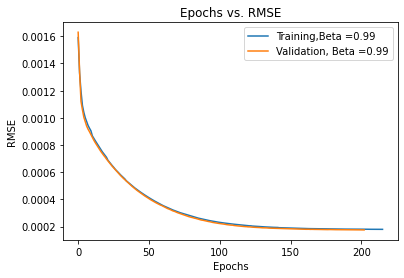

In [67]:
plt.plot(rsmet_final, label='Training,Beta =' + str(np.round(elem,3)))
plt.plot(rsmev, label='Validation, Beta =' + str(np.round(elem,3)))
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Epochs vs. RMSE')